In [1]:
import numpy as np
from matplotlib import pyplot as plt

import f3dasm

import botorch
import gpytorch

dim = 1
iterations = 20
seed = 123
number_of_samples = 10

fun = f3dasm.functions.Schwefel(
    dimensionality=dim,
    scale_bounds=np.tile([0.0, 1.0], (dim, 1)),
    )

parameter_DesignSpace = f3dasm.make_nd_continuous_design(
    bounds=np.tile([0.0, 1.0], (dim, 1)),
    dimensionality=dim,
)

sampler = f3dasm.sampling.SobolSequence(design=parameter_DesignSpace)

optimizer = f3dasm.optimization.BayesianOptimizationTorch(
    data=f3dasm.Data(design=parameter_DesignSpace),
    )
optimizer.init_parameters()

optimizer.parameter.noise_fix = True
# optimizer.parameter.acquisition_hyperparameters['beta'] = 20
# optimizer.parameter.kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.CosineKernel())
# optimizer.parameter.acquisition = botorch.acquisition.ExpectedImprovement
# optimizer.parameter.acquisition_hyperparameters = {
#     'best_f': np.inf,
#     'maximize': False,
# }

res = f3dasm.run_optimization(
    optimizer=optimizer,
    function=fun,
    sampler=sampler,
    iterations=iterations,
    seed=seed,
    number_of_samples=number_of_samples,
)

2022-12-02 15:14:04.674280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 15:14:04.807103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-02 15:14:04.807130: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-02 15:14:04.839403: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-02 15:14:05.494794: W tensorflow/stream_executor/platform/de

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [2]:
res.data

,input,output
,x0,y
0,0.000000,238.393741
1,0.500000,418.982900
2,0.750000,444.793087
3,0.250000,393.172713
4,0.375000,296.110482
5,0.875000,234.164590
6,0.625000,541.855318
7,0.125000,603.801210
8,0.187500,131.018857


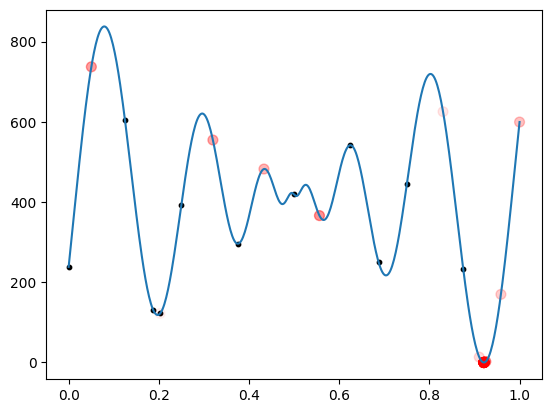

In [3]:
hist_data = res.data.loc[number_of_samples:]

if dim == 1:
    x_plot = np.linspace(0, 1, 500)[:, None]

    plt.plot(x_plot, fun(x_plot))

    init_data = res.data.loc[:number_of_samples]
    plt.scatter(init_data['input', 'x0'], init_data['output'], color='black', s=10)

    plt.scatter(hist_data['input', 'x0'], hist_data['output'], 
    color='red', s=50, alpha=np.arange(1, len(hist_data) + 1) / (len(hist_data) + 1))

    plt.show()

In [4]:
y_min_high_hist = hist_data[hist_data.output.y == hist_data.output.y.min()].output.y.values
y_min_high_hist

array([1.27327884e-05])